In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import precision_recall_curve,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error, median_absolute_error
warnings.filterwarnings("ignore")


In [2]:
dataclean = pd.read_csv("MasterFinal_f.csv")

In [3]:
list(dataclean.columns)

['Unnamed: 0',
 'title',
 'id',
 'release_date',
 'year',
 'month',
 'Director Ind',
 'budget',
 'runtime',
 'director_median_vote',
 'director_median_revenue',
 'Top3cast_median_revenue',
 'budget_inflation_reverse',
 'budget_inflation_to2020',
 'trend_average',
 'Director_Number',
 'country_count',
 'genre_count',
 'company_count',
 'cast_count',
 'awardedcast',
 'book',
 'isenglish',
 'country_Angola',
 'country_Argentina',
 'country_Australia',
 'country_Austria',
 'country_Bahamas',
 'country_Belarus',
 'country_Belgium',
 'country_Brazil',
 'country_Bulgaria',
 'country_Canada',
 'country_Chile',
 'country_China',
 'country_Costa Rica',
 'country_Croatia',
 'country_Czech Republic',
 'country_Denmark',
 'country_Ecuador',
 'country_Egypt',
 'country_Estonia',
 'country_Finland',
 'country_France',
 'country_Germany',
 'country_Gibraltar',
 'country_Greece',
 'country_Guatemala',
 'country_Hong Kong',
 'country_Hungary',
 'country_Iceland',
 'country_India',
 'country_Iran',
 'cou

In [4]:
#dataclean = dataclean[dataclean['revenue']>0]

In [5]:
a = ['Unnamed: 0',
 'title',
 'id',
 'release_date',
 'year',
 'month_6.0',
 'Director Ind','country_Angola','genre_Adventure','company_Amblin Entertainment',
    "budget_inflation_reverse","budget_inflation_to2020"]

In [6]:
for i in a:
    dataclean.drop(i,axis=1,inplace=True)
dataclean.dropna(axis=0, how='any', inplace=True)
X = dataclean.drop("revenue",axis=1)
p = X.shape[1]
dataclean['profit'] = dataclean["revenue"] - 3 * dataclean["budget"]
dataclean["target"] = dataclean["profit"].apply(lambda x: 1 if x >= 0 else 0)
dataclean["target"].value_counts()
y3 = dataclean["target"]
X_scaled = StandardScaler().fit_transform(X)

In [7]:
y = dataclean['revenue'].values
y2 = dataclean['profit'].values
dataclean['ROI'] = dataclean['revenue']/dataclean['budget'].values
y4 = dataclean['ROI'].values

In [8]:
Feature_name = X.columns

In [9]:
Feature_name

Index(['month', 'budget', 'runtime', 'director_median_vote',
       'director_median_revenue', 'Top3cast_median_revenue', 'trend_average',
       'Director_Number', 'country_count', 'genre_count',
       ...
       'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0', 'month_7.0',
       'month_8.0', 'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0'],
      dtype='object', length=194)

In [10]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.92904108,  0.24182143, -0.86744987, ...,  3.00379507,
        -0.28608003, -0.32655584],
       [ 1.50721818,  1.26949459, -0.05325607, ..., -0.33291219,
        -0.28608003,  3.06226344],
       [ 1.50721818, -0.16924784,  0.76093772, ..., -0.33291219,
        -0.28608003,  3.06226344],
       ...,
       [ 0.63995253, -0.5803171 , -0.58425203, ..., -0.33291219,
        -0.28608003, -0.32655584],
       [ 0.63995253, -0.5803171 ,  0.05294312, ..., -0.33291219,
        -0.28608003, -0.32655584],
       [ 0.63995253, -0.49223083, -0.51345256, ..., -0.33291219,
        -0.28608003, -0.32655584]])

Since we have 3k+ data so we split the data into "5:2:3" test 30% to make sure they are in the same distribution

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.3, random_state=40
)

In [12]:
 n = y_test.shape[0]

Mae: 32469167.4781445
score: 0.7135696284567055
score train: 0.7319005757887675
Alphas 100.0
adjusted R2 0.7080531258589284


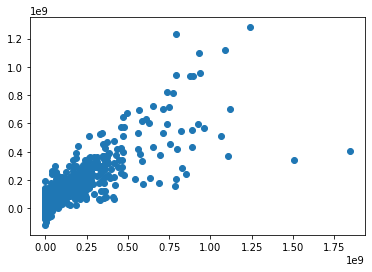

In [13]:
Ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11))
Ridge_model.fit(X_train, y_train)
y_pred = Ridge_model.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)
r = Ridge_model.score(X_train,y_train)
print("Mae:",mae)
print('score:', Ridge_model.score(X_test,y_test))
print('score train:', Ridge_model.score(X_train,y_train))
print('Alphas',Ridge_model.alpha_)
string_score = f'MAE on training set: {mae:.2f} '

r2 = 1-(1-r)*(n-1)/(n-p-1)
print('adjusted R2',r2)
plt.scatter(y_test, y_pred)

Mae: 32411109.693406448
score: 0.7144179962416854
adjusted R2 0.7080531258589284
score train: 0.7318502605776163
100000.0


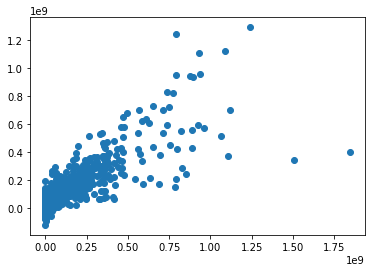

In [14]:
from sklearn.linear_model import LassoCV
Lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11))
Lasso_model.fit(X_train, y_train)
y_pred = Lasso_model.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)
r = Ridge_model.score(X_train,y_train)
print("Mae:",mae)
print('score:', Lasso_model.score(X_test,y_test))
print('adjusted R2',r2)
print('score train:', Lasso_model.score(X_train,y_train))
print(Lasso_model.alpha_)
plt.scatter(y_test, y_pred)

Mae: 22264059.083149318
Median er: 4332693.2458892055
mse: 3988969887085133.5
score: 0.789339151649254
adjusted R2 0.7706008643589997
score train: 0.8931930927618601


Text(0, 0.5, 'Predict Revenue')

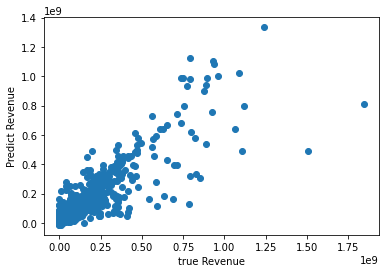

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 600,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
r = reg.score(X_test,y_test)
r2 = 1-(1-r)*(n-1)/(n-p-1)
y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_pred,y_test)
print("Mae:",mae)
print("Median er:",median_absolute_error(y_pred,y_test))
print("mse:",mean_squared_error(y_pred,y_test))
print('score:', reg.score(X_test,y_test))
print('adjusted R2',r2)
print('score train:', reg.score(X_train,y_train))
plt.scatter(y_test, y_pred)
plt.xlabel('true Revenue') 
plt.ylabel('Predict Revenue')

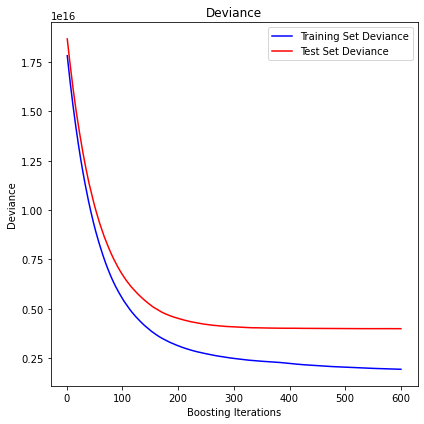

In [16]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Mae: 22922107.544292342
Median er: 4112877.1246504616
mse: 4019895950864704.0
score: 0.7877059202596046
adjusted R2 0.7688223569997987
score train: 0.9046789825619325


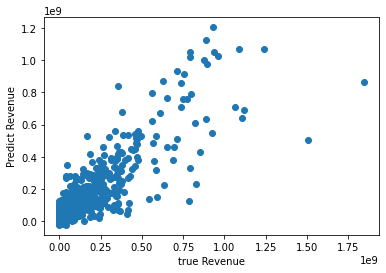

In [17]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
gridParams = {
    'learning_rate': [0.05],
    'max_iter':[300],
    'max_leaf_nodes':[40],
    'max_depth':[8],
    'validation_fraction':[0.1]
    }
gridreg = HistGradientBoostingRegressor()
gridreg.fit(X_train, y_train)
y_pred = gridreg.predict(X_test)
mae = mean_absolute_error(y_pred,y_test)
r = gridreg.score(X_test,y_test)
r2 = 1-(1-r)*(n-1)/(n-p-1)
print("Mae:",mae)
print("Median er:",median_absolute_error(y_pred,y_test))
print("mse:",mean_squared_error(y_pred,y_test))
print('score:', gridreg.score(X_test,y_test))
print('adjusted R2',r2)
print('score train:', gridreg.score(X_train,y_train))
plt.scatter(y_test, y_pred)
plt.xlabel('true Revenue') 
plt.ylabel('Predict Revenue')
fig.tight_layout()
plt.show()

In [18]:
coefs = pd.DataFrame(
    Lasso_model.coef_,
    columns=['Coefficients'],index = Feature_name
)
coefs.to_csv("Lasso_model_Revenue.csv")

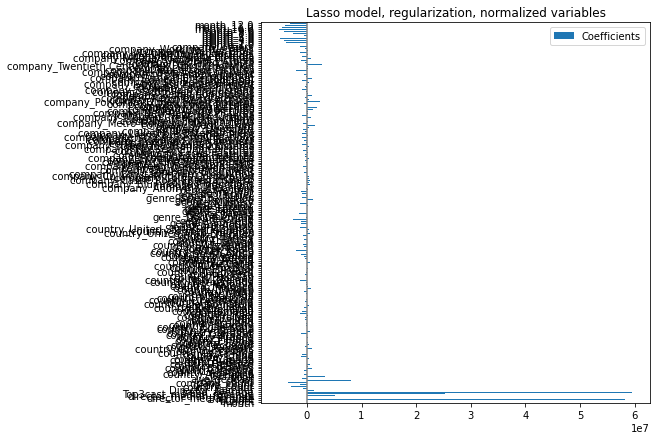

In [19]:
coefs = pd.DataFrame(
    Lasso_model.coef_,
    columns=['Coefficients'], index=Feature_name
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [20]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_scaled, y2, test_size = 0.3, random_state=40
)

Mae: 32820547.06116332
score: 0.31772154084730797
score train: 0.4391586824821958
Alphas 10.0
adjusted R2 0.389271834431552


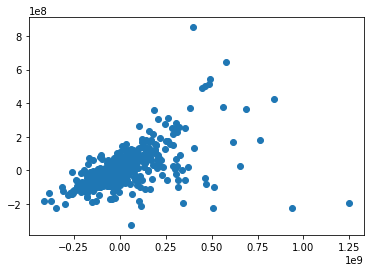

In [21]:
Ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11))
Ridge_model.fit(X_train1, y_train1)
y_pred1 = Ridge_model.predict(X_test1)
mae = mean_absolute_error(y_pred1,y_test1)
r = Ridge_model.score(X_train1,y_train1)
print("Mae:",mae)
print('score:', Ridge_model.score(X_test1,y_test1))
print('score train:', Ridge_model.score(X_train1,y_train1))
print('Alphas',Ridge_model.alpha_)
string_score = f'MAE on training set: {mae:.2f} '

r2 = 1-(1-r)*(n-1)/(n-p-1)
print('adjusted R2',r2)
plt.scatter(y_test1, y_pred1)

Mae: 32442963.502648644
score: 0.3210391791301881
adjusted R2 0.389271834431552
score train: 0.43877570985573244
100000.0


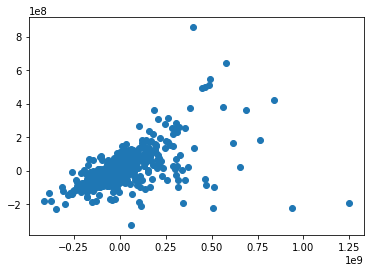

In [22]:
from sklearn.linear_model import LassoCV
Lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11))
Lasso_model.fit(X_train1, y_train1)
y_pred1 = Lasso_model.predict(X_test1)
mae = mean_absolute_error(y_pred1,y_test1)
r = Ridge_model.score(X_train1,y_train1)
print("Mae:",mae)
print('score:', Lasso_model.score(X_test1,y_test1))
print('adjusted R2',r2)
print('score train:', Lasso_model.score(X_train1,y_train1))
print(Lasso_model.alpha_)
plt.scatter(y_test1, y_pred1)

Mae: 32442963.502648644
Median er: 14752367.469656298
mse: 5404638516271009.0
score: 0.42283683286837115
adjusted R2 0.37149815592039503
score train: 0.6249020394583598


Text(0, 0.5, 'Predict Profit')

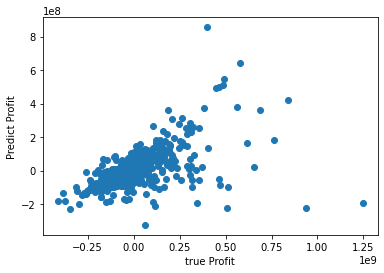

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 400,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train1, y_train1)
r = reg.score(X_test1,y_test1)
r2 = 1-(1-r)*(n-1)/(n-p-1)
y_pred = reg.predict(X_test1)

mae = mean_absolute_error(y_pred1,y_test1)
print("Mae:",mae)
print("Median er:",median_absolute_error(y_pred1,y_test1))
print("mse:",mean_squared_error(y_pred1,y_test1))
print('score:', reg.score(X_test1,y_test1))
print('adjusted R2',r2)
print('score train:', reg.score(X_train1,y_train1))
plt.scatter(y_test1, y_pred1)
plt.xlabel('true Profit') 
plt.ylabel('Predict Profit')

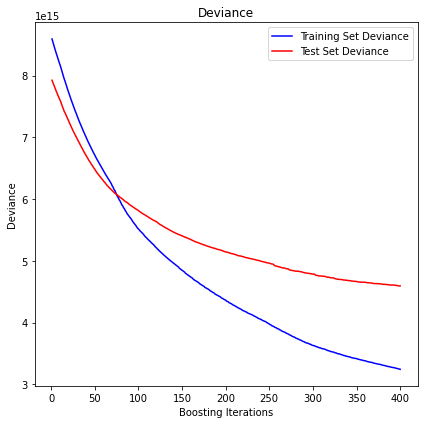

In [24]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred1 in enumerate(reg.staged_predict(X_test1)):
    test_score[i] = reg.loss_(y_test1, y_pred1)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Mae: 23097263.286907647
Median er: 4353445.730445288
score: 0.4645703206447299
score: 0.6951854470398041
r2 adjust 0.4169438383912121


Text(0, 0.5, 'Predict Profit')

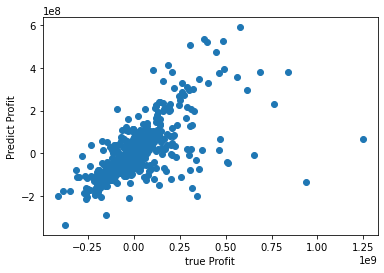

In [25]:
from sklearn.ensemble import HistGradientBoostingRegressor
est2 = HistGradientBoostingRegressor(learning_rate= 0.05,
    max_iter=100,
    max_depth=8).fit(X_train1, y_train1)
y_pred1 = est2.predict(X_test1)
mae = mean_absolute_error(y_pred1,y_test1)
r = est2.score(X_test1,y_test1)
r2 = 1-(1-r)*(n-1)/(n-p-1)
print("Mae:",mae)
print("Median er:",median_absolute_error(y_pred1,y_test1))
print('score:', est2.score(X_test1,y_test1))
print('score:', est2.score(X_train1,y_train1))
print('r2 adjust',r2)
plt.scatter(y_test1, y_pred1)
plt.xlabel('true Profit') 
plt.ylabel('Predict Profit')

In [26]:
coefs = pd.DataFrame(
    Lasso_model.coef_,
    columns=['Coefficients'],index = Feature_name
)
coefs.to_csv("Lasso_model_Profit.csv")

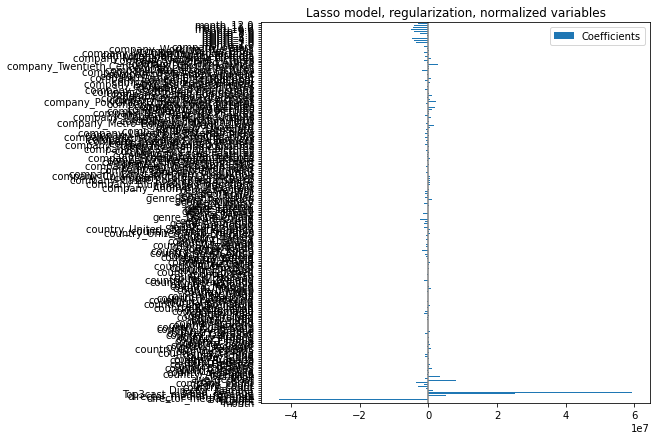

In [27]:
coefs = pd.DataFrame(
    Lasso_model.coef_,
    columns=['Coefficients'], index=Feature_name
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [28]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y4, test_size = 0.3, random_state=40
)

In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import median_absolute_error
Ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11))
Ridge_model.fit(X_train2, y_train2)
y_pred2 = Ridge_model.predict(X_test2)
mae = mean_absolute_error(y_pred2,y_test2)
r = Ridge_model.score(X_test2,y_test2)
r2 = 1-(1-r)*(n-1)/(n-p-1)
print('adjusted R2',r2)
print("Mae:",mae)
print('score:', Ridge_model.score(X_test2,y_test2))
print('Train score:', Ridge_model.score(X_train2,y_train2))
print(Ridge_model.alpha_)

adjusted R2 -1.262802663923555
Mae: 189.37349774166245
score: -1.0779674147441152
Train score: 0.010963827984327712
100000.0


Mae: 183.97304861944374
score: -26.376851849650123


Text(0, 0.5, 'Predict ROI')

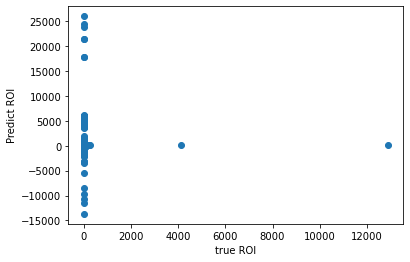

In [30]:
from sklearn.ensemble import HistGradientBoostingRegressor
est3 = HistGradientBoostingRegressor().fit(X_train2, y_train2)
y_pred2 = est3.predict(X_test2)
mae = mean_absolute_error(y_pred2,y_test2)
print("Mae:",mae)
print('score:', est3.score(X_test2,y_test2))
plt.scatter(y_test2, y_pred2)
plt.xlabel('true ROI') 
plt.ylabel('Predict ROI')

In [31]:
dataclean2 = dataclean[dataclean['ROI']<20]
dataclean2 = dataclean2[dataclean2['ROI']>0]

In [32]:
X2 = dataclean2.drop("revenue",axis=1)
X2 = X2.drop("profit",axis=1)
X2 = X2.drop("target",axis=1)
X2 = X2.drop("ROI",axis=1)
y5 = dataclean2['ROI'].values
X_scaled2 = StandardScaler().fit_transform(X2)
X_scaled2 = pd.DataFrame(X_scaled2)

In [33]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled2, y5, test_size = 0.3, random_state=40
)

In [34]:
n = y_test2.shape[0]

adjusted R2 0.502161469087319
Mae: 1.2780478382865128
score: 0.5707070155721026
Train score: 0.8525021970443143
Median er: 0.6876333092960525


Text(0, 0.5, 'Predict ROI')

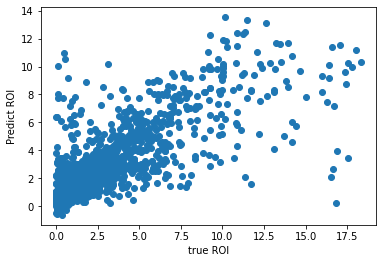

In [35]:
from sklearn.ensemble import HistGradientBoostingRegressor
est3 = HistGradientBoostingRegressor().fit(X_train2, y_train2)
y_pred2 = est3.predict(X_test2)
mae = mean_absolute_error(y_pred2,y_test2)
r = est3.score(X_test2,y_test2)
r2 = 1-(1-r)*(n-1)/(n-p-1)
print('adjusted R2',r2)
print("Mae:",mae)
print('score:', est3.score(X_test2,y_test2))
print('Train score:', est3.score(X_train2,y_train2))
print("Median er:",median_absolute_error(y_pred2,y_test2))
plt.scatter(y_test2, y_pred2)
plt.xlabel('true ROI') 
plt.ylabel('Predict ROI')

In [36]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import median_absolute_error
Ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11))
Ridge_model.fit(X_train2, y_train2)
y_pred2 = Ridge_model.predict(X_test2)
mae = mean_absolute_error(y_pred2,y_test2)
r = Ridge_model.score(X_test2,y_test2)
r2 = 1-(1-r)*(n-1)/(n-p-1)
print('adjusted R2',r2)
print("Mae:",mae)
print('score:', Ridge_model.score(X_test2,y_test2))
print('Train score:', Ridge_model.score(X_train2,y_train2))
print(Ridge_model.alpha_)

adjusted R2 -0.003965952590182953
Mae: 2.134623180829286
score: 0.13426640709931004
Train score: 0.22047444163768326
1000.0


In [37]:
Lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11))
Lasso_model.fit(X_train2, y_train2)
y_pred2 = Lasso_model.predict(X_test2)
mae = mean_absolute_error(y_pred2,y_test2)
r = Lasso_model.score(X_test2,y_test2)
r2 = 1-(1-r)*(n-1)/(n-p-1)
print('adjusted R2',r2)
print("Mae:",mae)
print('score:', Lasso_model.score(X_test2,y_test2))
print('Train score:', Lasso_model.score(X_train2,y_train2))
print(Ridge_model.alpha_)

adjusted R2 0.011187391842659489
Mae: 2.1174352371996257
score: 0.14733334356907835
Train score: 0.20149597958570253
1000.0


adjusted R2 0.011187391842659489
Mae: 2.1239326037480577
score: 0.13772962013852108
Train score: 0.23280330573666008


Text(0, 0.5, 'Predict ROI')

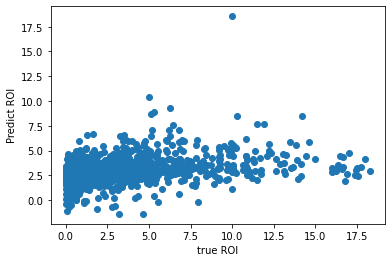

In [38]:
from sklearn.linear_model import BayesianRidge
clf = BayesianRidge(compute_score=True)
clf.fit(X_train2, y_train2)
y_pred2 = clf.predict(X_test2)
mae = mean_absolute_error(y_pred2,y_test2)
r = Lasso_model.score(X_test2,y_test2)
r2 = 1-(1-r)*(n-1)/(n-p-1)
print('adjusted R2',r2)
print("Mae:",mae)
print('score:', clf.score(X_test2,y_test2))
print('Train score:', clf.score(X_train2,y_train2))
plt.scatter(y_test2, y_pred2)
plt.xlabel('true ROI') 
plt.ylabel('Predict ROI')

Mae: 2.1239326037480577
Median er: 1.5670262311111731
mse: 9.649337116017671
score: 0.5492015617007306
adjusted R2 0.47722222258134106
score train: 0.7627897195384024


Text(0, 0.5, 'Predict Revenue')

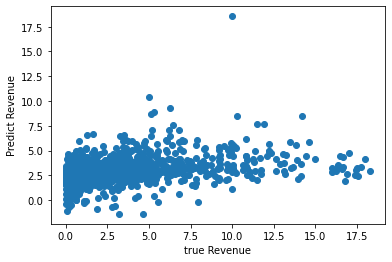

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train2, y_train2)
r = reg.score(X_test2,y_test2)
r2 = 1-(1-r)*(n-1)/(n-p-1)
y_pred = reg.predict(X_test2)

mae = mean_absolute_error(y_pred2,y_test2)
print("Mae:",mae)
print("Median er:",median_absolute_error(y_pred2,y_test2))
print("mse:",mean_squared_error(y_pred2,y_test2))
print('score:', reg.score(X_test2,y_test2))
print('adjusted R2',r2)
print('score train:', reg.score(X_train2,y_train2))
plt.scatter(y_test2, y_pred2)
plt.xlabel('true Revenue') 
plt.ylabel('Predict Revenue')

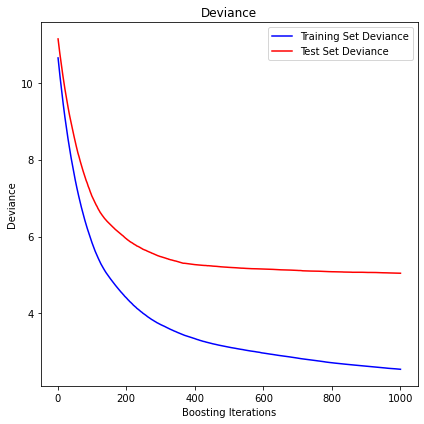

In [40]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred2 in enumerate(reg.staged_predict(X_test2)):
    test_score[i] = reg.loss_(y_test2, y_pred2)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [41]:
coefs = pd.DataFrame(
    Lasso_model.coef_,
    columns=['Coefficients'],index = Feature_name
)
coefs.to_csv("Lasso_model_ROI.csv")

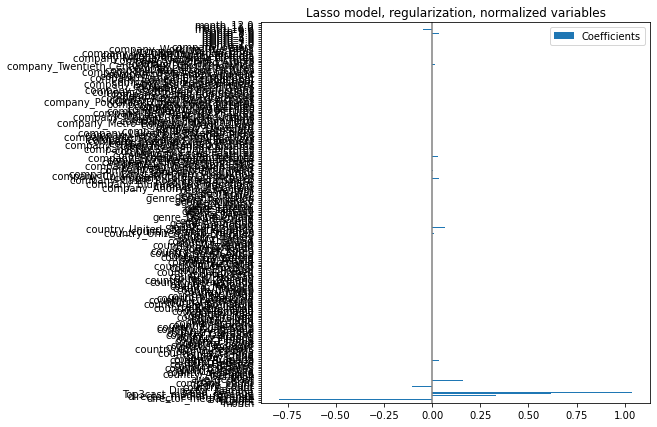

In [42]:
coefs = pd.DataFrame(
    Lasso_model.coef_,
    columns=['Coefficients'], index=Feature_name
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y3, test_size = 0.3, random_state=40
)

In [44]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(
    X, y3, test_size = 0.3, random_state=40
)

In [45]:
from sklearn import preprocessing, metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
from sklearn.metrics import precision_recall_curve,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
def resultoutput(beta,classifiername,X_test, y_test):
    if hasattr(classifiername, "decision_function"): # decision fuction Take precedence over Predict proba for binary
        y_score = classifiername.decision_function(X_test)
    elif hasattr(classifiername, "predict_proba"):
        y_score = classifiername.predict_proba(X_test)[:, 1]
    else:
        y_score = classifiername.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    f_score = (1+ beta**2)*precision*recall/(beta**2*(precision+recall)) # define f beta score
    plt.plot(thresholds, f_score[:-1], "b--", label="Precision") 
    plt.xlabel("Threshold") 
    plt.show()
    f1list = f_score.tolist()
    index1 = f1list.index(max(f1list))
    threshold = thresholds.tolist()[index1]
    print('Threshold:',thresholds.tolist()[index1]) # select best thresholds
    print('precision:',precision.tolist()[index1]) # calculate precision
    print('recall:',recall.tolist()[index1]) # calculate recall
    print('choosen Beta',beta)
    print('f1-score:',max(f1list))# calculate f beta score
    print('AUC under ROC',roc_auc_score(y_test, y_score))# calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, linewidth=2, label=None) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.show()
    y_pred2 = []
    for z in range(X_test.shape[0]):
        if y_score[z] >= threshold:       
            y_pred2.append(1)
        else:  
            y_pred2.append(0)
    accuracy_value = accuracy_score(y_pred2,y_test)
    print('Accuracy',accuracy_value)# calculate Accuracy

In [47]:
from sklearn.linear_model import LogisticRegressionCV

classifier1 = Pipeline((
("scaler", StandardScaler()),
("Logistics", LogisticRegressionCV(cv = 10,random_state=0)), ))


classifier1.fit(X_train, y_train)
print('C = :',classifier1["Logistics"].C_)

C = : [2.7825594]


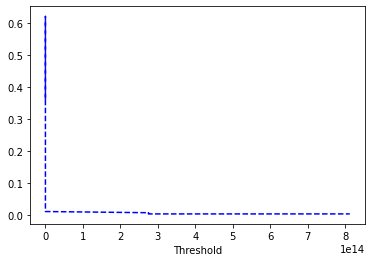

Threshold: -0.8930842490118654
precision: 0.6091743119266055
recall: 0.6347992351816444
choosen Beta 1
f1-score: 0.6217228464419476
AUC under ROC 0.8303294022715477


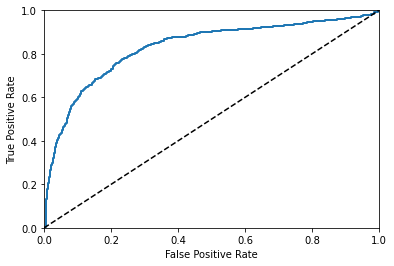

Accuracy 0.82996632996633


In [48]:
resultoutput(beta = 1,classifiername = classifier1 , X_test =X_test,y_test=y_test)

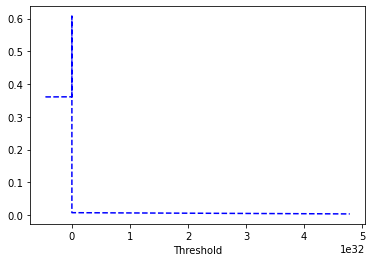

Threshold: -0.6764758940533044
precision: 0.5525902668759811
recall: 0.6730401529636711
choosen Beta 1
f1-score: 0.6068965517241379
AUC under ROC 0.812845481308281


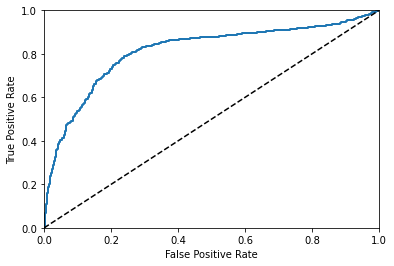

Accuracy 0.8080808080808081


In [49]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline((
            ("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5,probability=True)) ))
poly_kernel_svm_clf.fit(X_train, y_train)
resultoutput(beta = 1,classifiername = poly_kernel_svm_clf , X_test =X_test,y_test=y_test)

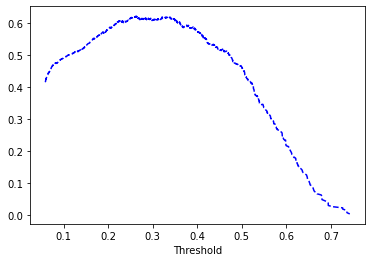

Threshold: 0.26314345335035366
precision: 0.5105067985166872
recall: 0.7896749521988528
choosen Beta 1
f1-score: 0.6201201201201201
AUC under ROC 0.8661072582417639


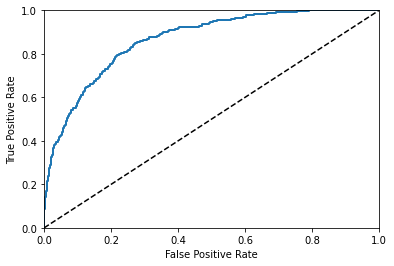

Accuracy 0.7870370370370371


In [50]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16), n_estimators=500, max_samples=200, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, y_train) 
resultoutput(beta = 1,classifiername = bag_clf , X_test =X_test,y_test=y_test)

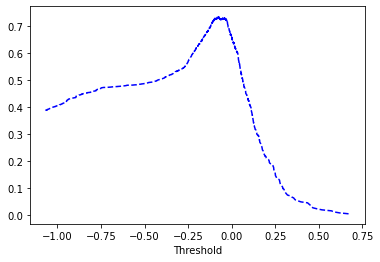

Threshold: -0.08106308951665434
precision: 0.6581325301204819
recall: 0.8355640535372849
choosen Beta 1
f1-score: 0.7363100252737994
AUC under ROC 0.9320800644709267


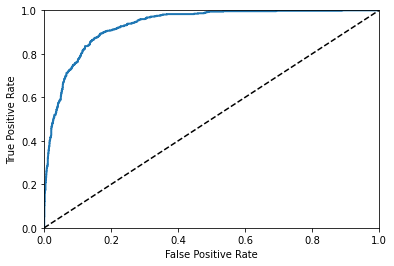

Accuracy 0.8682659932659933


In [51]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200, algorithm="SAMME.R", learning_rate=0.05
)
ada_clf.fit(X_train, y_train)
resultoutput(beta = 1,classifiername = ada_clf , X_test =X_test,y_test=y_test)

In [52]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
gridParams = {
    'learning_rate': [0.05],
    'max_iter':[100],
    'max_leaf_nodes':[40],
    'max_depth':[8],
    'validation_fraction':[0.1]
    }
clf = HistGradientBoostingClassifier()

gridhg = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)

gridhg.fit(X_train,y_train)
gridhg.best_params_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   27.1s finished


{'learning_rate': 0.05,
 'max_depth': 8,
 'max_iter': 100,
 'max_leaf_nodes': 40,
 'validation_fraction': 0.1}

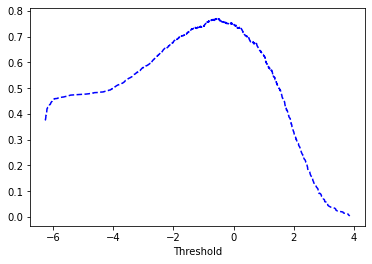

Threshold: -0.5191613713923323
precision: 0.7348353552859619
recall: 0.8107074569789675
choosen Beta 1
f1-score: 0.770909090909091
AUC under ROC 0.9462284817447598


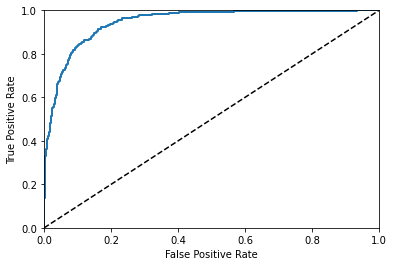

Accuracy 0.8939393939393939


In [53]:
resultoutput(beta = 1,classifiername = gridhg , X_test =X_test,y_test=y_test)

In [54]:
y_pred = gridhg.predict_proba(X_test)[:, 1]
#Check best threshold
threshold_value = []
accuracy_value = []
y_pred2 = []
for i in np.linspace(0,1,100):
    
    threshold = i
    for z in range(X_test.shape[0]):
        if y_pred[z] >= threshold:       
            y_pred2.append(1)
        else:  
            y_pred2.append(0)
        
    threshold_value.append(i)
   
    accuracy_value.append(accuracy_score(y_pred2,y_test))
    y_pred2 = []
df_threshold = pd.DataFrame(list(zip(threshold_value,accuracy_value)), columns=["threshold","accuracy"])

df_threshold[df_threshold["accuracy"] ==  df_threshold["accuracy"].max()]

threshold  accuracy
49   0.494949  0.896044

In [78]:
# setting threshold to number
y_pred2 = []
threshold = 0.494949
for i in range(X_test.shape[0]):
    if y_pred[i] >= threshold:       
       y_pred2.append(1)
    else:  
       y_pred2.append(0)

In [79]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
# Evaluation metricks
print('AUC of LGB classifier on test set:{:.3f}\n'.format(roc_auc_score(y_test,y_pred)))
print('Accuracy of LGB  classifier on test set: {:.3f}\n'.format(accuracy_score(y_test,y_pred2)))
print('Precision of LGB  classifier on test set: {:.3f}\n'.format(precision_score(y_test,y_pred2)))
print('Recall of LGB  classifier on test set: {:.3f}\n'.format(recall_score(y_test,y_pred2)))
print('F1_score of LGB  classifier on test set: {:.3f}\n'.format(f1_score(y_test,y_pred2)))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred2))

AUC of LGB classifier on test set:0.947

Accuracy of LGB  classifier on test set: 0.896

Precision of LGB  classifier on test set: 0.805

Recall of LGB  classifier on test set: 0.694

F1_score of LGB  classifier on test set: 0.745

Confusion matrix
 [[1765   88]
 [ 160  363]]


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, confusion_matrix, mean_squared_log_error
import lightgbm as lgb
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [58]:
gridParams = {
    'boosting_type': ['gbdt'],
    'colsample_bytree': [0.7],
    'learning_rate': [0.05],
    'max_depth': [6],
    'metric': ['auc'],
    'min_data_in_leaf': [10],
    'min_split_gain': [0.01],
    'num_leaves': [90],
    'objective': ['binary'],
    'random_state': [501],
    'subsample': [0.5]}

clf = lgb.LGBMRegressor()
grid = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)
grid.fit(X_train,y_train)

grid.best_params_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'metric': 'auc',
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 90,
 'objective': 'binary',
 'random_state': 501,
 'subsample': 0.5}

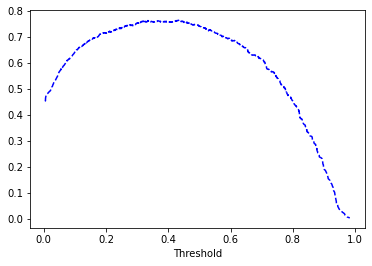

Threshold: 0.43242169065837227
precision: 0.7708737864077669
recall: 0.7590822179732314
choosen Beta 1
f1-score: 0.7649325626204239
AUC under ROC 0.9469012577402776


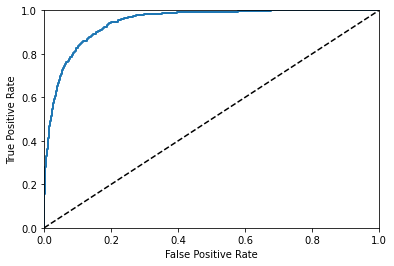

Accuracy 0.8973063973063973


In [59]:
resultoutput(beta = 1, classifiername = grid , X_test =X_test, y_test=y_test)

Text(0, 0.5, 'Feature Importance Score')

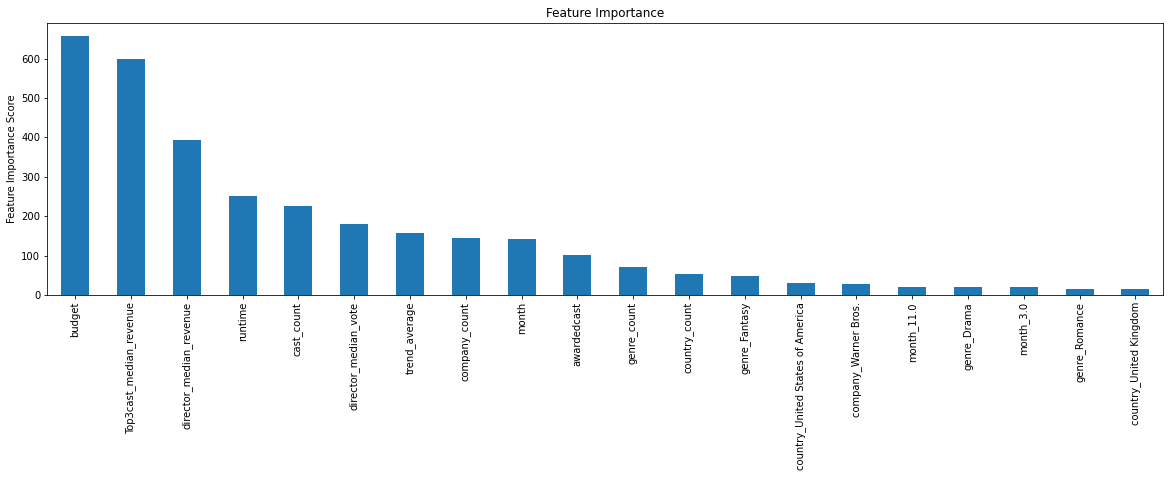

In [60]:
#Feature importance for top 50 predictors
predictors = [x for x in X.columns]
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:20]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

In [61]:
predictors = [x for x in X.columns]
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:10]
feat_imp.to_csv("Feature importance.csv")

In [62]:
y_pred = grid.predict(X_test[[1]])
if y_pred >= 0.434343:
    y_pred = 1
else:
    y_pred = 0

In [63]:
Xdata = pd.DataFrame(X_test7)

In [64]:
Xdata

month    budget  runtime  director_median_vote  director_median_revenue  \
5869    9.0   5000000     97.0                   6.4               20016181.0   
6257    5.0  24000000    134.0                   6.4               20016181.0   
6358    1.0   1000000     99.0                   6.4               20016181.0   
2289   10.0   4000000    120.0                   6.2               28921264.0   
383    10.0   1365000    110.0                   7.3                2279000.0   
...     ...       ...      ...                   ...                      ...   
4351    4.0  85000000    107.0                   6.4               20016181.0   
3810   12.0  65000000    117.0                   6.4               20016181.0   
3507    9.0     60000     78.0                   6.4               20016181.0   
4792    3.0    150000     11.0                   6.4               20016181.0   
2896    4.0   1500000    124.0                   6.8                      0.0   

      Top3cast_median_revenue  trend_average  Director_Number  country_count  \
5869                9114264.0      50.801324              1.0              5   
6257               12096300.0       2.596026              1.0              1   
6358                 395000.0       5.490066              1.0              1   
2289               20987511.0      13.874172              1.0              1   
383                 2279000.0      13.874172              1.0              1   
...                       ...            ...              ...            ...   
4351              102984862.0      12.033113              1.0              1   
3810               41037742.0      70.615894              1.0              1   
3507                      0.0      13.874172              1.0              1   
4792                      0.0       2.913907              1.0              1   
2896                      0.0      13.874172              1.0              1   

      genre_count  ...  month_2.0  month_3.0  month_4.0  month_5.0  month_7.0  \
5869            3  ...          0          0          0          0          0   
6257            2  ...          0          0          0          1          0   
6358            2  ...          0          0          0          0          0   
2289            1  ...          0          0          0          0          0   
383             2  ...          0          0          0          0          0   
...           ...  ...        ...        ...        ...        ...        ...   
4351            4  ...          0          0          1          0          0   
3810            3  ...          0          0          0          0          0   
3507            1  ...          0          0          0          0          0   
4792            2  ...          0          1          0          0          0   
2896            1  ...          0          0          1          0          0   

      month_8.0  month_9.0  month_10.0  month_11.0  month_12.0  
5869          0          1           0           0           0  
6257          0          0           0           0           0  
6358          0          0           0           0           0  
2289          0          0           1           0           0  
383           0          0           1           0           0  
...         ...        ...         ...         ...         ...  
4351          0          0           0           0           0  
3810          0          0           0           0           1  
3507          0          1           0           0           0  
4792          0          0           0           0           0  
2896          0          0           0           0           0  

[2376 rows x 194 columns]

In [65]:
Xdata["budget"].describe()

count    2.376000e+03
mean     2.119426e+07
std      3.374226e+07
min      1.000000e+02
25%      2.000000e+06
50%      8.500000e+06
75%      2.500000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [66]:
Xdata.iloc[1][0]

5.0

In [67]:
y_test

5869    0
6257    0
6358    0
2289    1
383     0
       ..
4351    1
3810    1
3507    0
4792    0
2896    0
Name: target, Length: 2376, dtype: int64

In [68]:
error = []
for i in range(X_test.shape[0]):
    y_pred = grid.predict(X_test[[i]])
    if y_pred >= 0.434343:
        y_pred = 1
    else:
        y_pred = 0
    if list(y_test)[i] != y_pred and y_pred == 1 :
        s = Xdata.iloc[i][0]
        error.append(s)

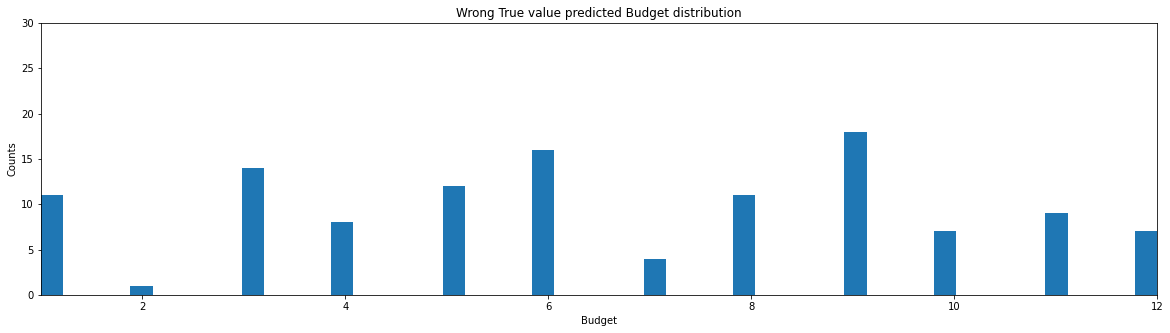

In [69]:
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax):
    plt.hist(myList,50)
    plt.xlabel(Xlabel)
    plt.xlim(Xmin,Xmax)
    plt.ylabel(Ylabel)
    plt.ylim(Ymin,Ymax)
    plt.title(Title)
    plt.show()

draw_hist(error,'Wrong True value predicted Budget distribution','Budget','Counts',min(error),max(error),0,30)   # 直方图展示

In [70]:
error = []
for i in range(X_test.shape[0]):
    y_pred = grid.predict(X_test[[i]])
    if y_pred >= 0.434343:
        y_pred = 1
    else:
        y_pred = 0
    if list(y_test)[i] != y_pred and y_pred == 0 :
        s = Xdata.iloc[i][0]
        error.append(s)

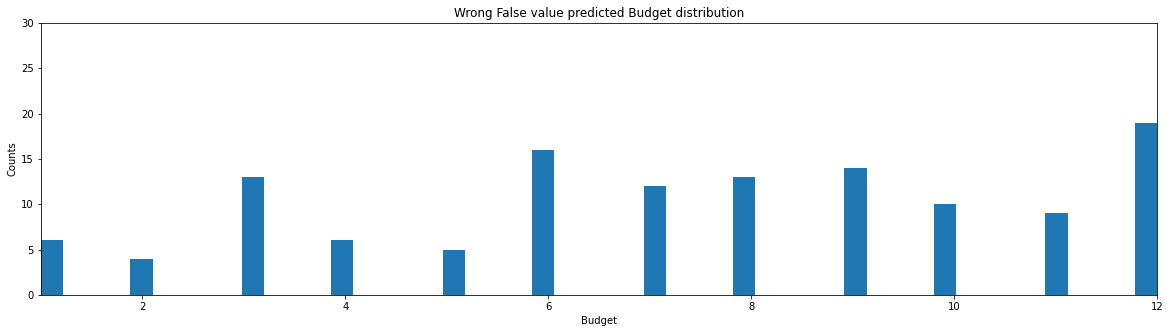

In [71]:
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax):
    plt.hist(myList,50)
    plt.xlabel(Xlabel)
    plt.xlim(Xmin,Xmax)
    plt.ylabel(Ylabel)
    plt.ylim(Ymin,Ymax)
    plt.title(Title)
    plt.show()

draw_hist(error,'Wrong False value predicted Budget distribution','Budget','Counts',min(error),max(error),0,30)   # 直方图展示

(array([1.056e+03, 3.370e+02, 2.220e+02, 1.340e+02, 1.660e+02, 5.800e+01,
        6.900e+01, 3.300e+01, 4.700e+01, 4.400e+01, 1.700e+01, 2.600e+01,
        1.500e+01, 1.900e+01, 2.400e+01, 6.000e+00, 1.500e+01, 6.000e+00,
        7.000e+00, 1.100e+01, 6.000e+00, 4.000e+00, 1.000e+00, 5.000e+00,
        1.600e+01, 2.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000000e+02, 6.00009800e+06, 1.20000960e+07, 1.80000940e+07,
        2.40000920e+07, 3.00000900e+07, 3.60000880e+07, 4.20000860e+07,
        4.80000840e+07, 5.40000820e+07, 6.00000800e+07, 6.60000780e+07,
        7.20000760e+07, 7.80000740e+07, 8.40000720e+07, 9.00000700e+07,
        9.60000680e+07, 1.02000066e+08, 1.08000064e+08, 1.14000062e+08,
        1.200000

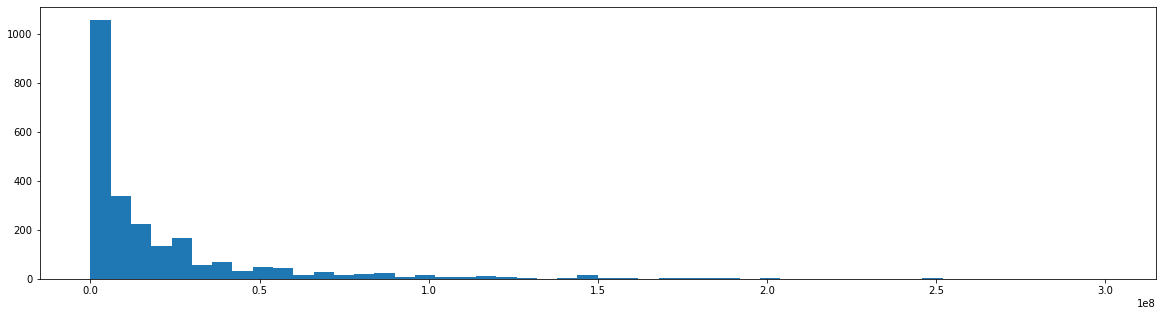

In [72]:
plt.hist(Xdata['budget'],50)

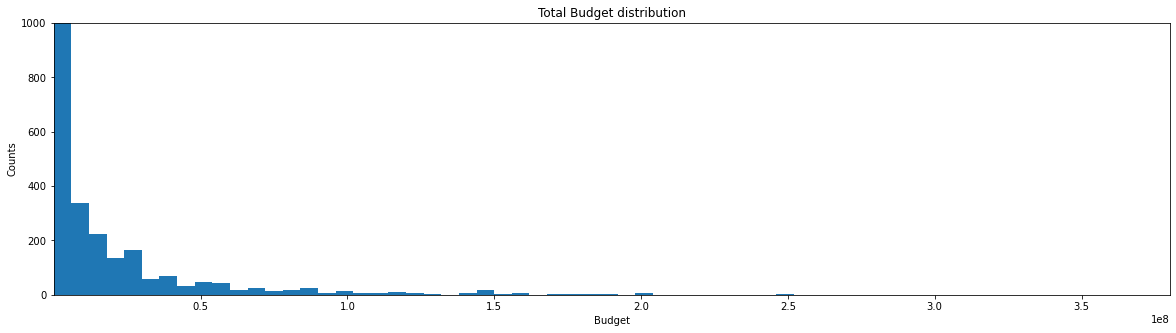

In [73]:
draw_hist(Xdata['budget'],'Total Budget distribution','Budget','Counts',min(dataclean['budget']),max(dataclean['budget']),0,1000)   # 直方图展示

In [74]:
a.to_csv("Erroranalysis.csv")

AttributeError: 'list' object has no attribute 'to_csv'

In [75]:
y_pred = grid.predict(X_test)
#Check best threshold
threshold_value = []
accuracy_value = []
y_pred2 = []
for i in np.linspace(0,1,100):
    
    threshold = i
    for z in range(X_test.shape[0]):
        if y_pred[z] >= threshold:       
            y_pred2.append(1)
        else:  
            y_pred2.append(0)
        
    threshold_value.append(i)
   
    accuracy_value.append(accuracy_score(y_pred2,y_test))
    y_pred2 = []
df_threshold = pd.DataFrame(list(zip(threshold_value,accuracy_value)), columns=["threshold","accuracy"])

df_threshold[df_threshold["accuracy"] ==  df_threshold["accuracy"].max()]

threshold  accuracy
44   0.444444  0.897306

In [77]:
# setting threshold to number
y_pred2 = []
threshold = 0.444444
for i in range(X_test.shape[0]):
    if y_pred[i] >= threshold:       
       y_pred2.append(1)
    else:  
       y_pred2.append(0)
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
# Evaluation metricks
print('AUC of LGB classifier on test set:{:.3f}\n'.format(roc_auc_score(y_test,y_pred)))
print('Accuracy of LGB  classifier on test set: {:.3f}\n'.format(accuracy_score(y_test,y_pred2)))
print('Precision of LGB  classifier on test set: {:.3f}\n'.format(precision_score(y_test,y_pred2)))
print('Recall of LGB  classifier on test set: {:.3f}\n'.format(recall_score(y_test,y_pred2)))
print('F1_score of LGB  classifier on test set: {:.3f}\n'.format(f1_score(y_test,y_pred2)))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred2))

AUC of LGB classifier on test set:0.947

Accuracy of LGB  classifier on test set: 0.897

Precision of LGB  classifier on test set: 0.778

Recall of LGB  classifier on test set: 0.746

F1_score of LGB  classifier on test set: 0.762

Confusion matrix
 [[1742  111]
 [ 133  390]]
